<a href="https://colab.research.google.com/github/Hemantsharma1000/Personal-Projets/blob/main/Adani_Power_Stocks_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('Adani_power_LTD_data_file.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,11/13/2023,398.65,399.45,388.00,390.85,"936,065"
1,11/10/2023,399.95,406.90,394.85,399.10,"1,204,617"
2,11/09/2023,394.40,409.40,391.10,401.10,"2,662,633"
3,11/08/2023,384.00,395.05,381.35,393.45,"852,048"
4,11/07/2023,393.70,401.85,380.10,383.30,"648,271"


In [ ]:
stock_data = data[['Date','Close']]
stock_data

,Date,Close
0,11/13/2023,390.85
1,11/10/2023,399.10
2,11/09/2023,401.10
3,11/08/2023,393.45
4,11/07/2023,383.30
...,...,...
244,11/18/2022,336.50
245,11/17/2022,337.00
246,11/16/2022,345.00
247,11/15/2022,356.45


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   Close   249 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.0+ KB


In [ ]:
stock_data.describe()

,Close
count,249.000000
mean,273.002610
std,65.713679
min,139.500000
25%,235.650000
50%,273.150000
75%,325.350000
max,401.100000


In [ ]:
stock_data.head(5)

,Close
Date,
2023-11-13,390.85
2023-11-10,399.10
2023-11-09,401.10
2023-11-08,393.45
2023-11-07,383.30


In [ ]:
pd.to_datetime(stock_data.Date)
stock_data['Date'] = pd.to_datetime(stock_data.Date)

In [ ]:
stock_data = stock_data.set_index('Date')

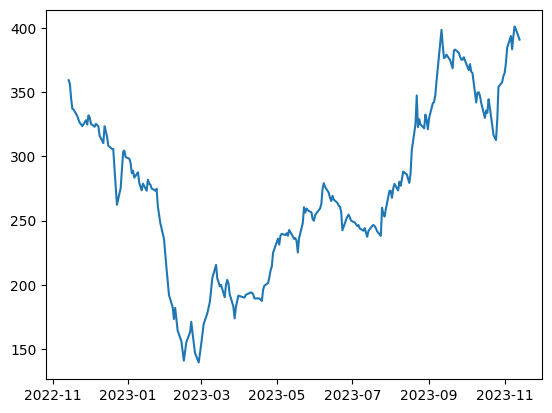

In [ ]:
plt.plot(stock_data.Close)

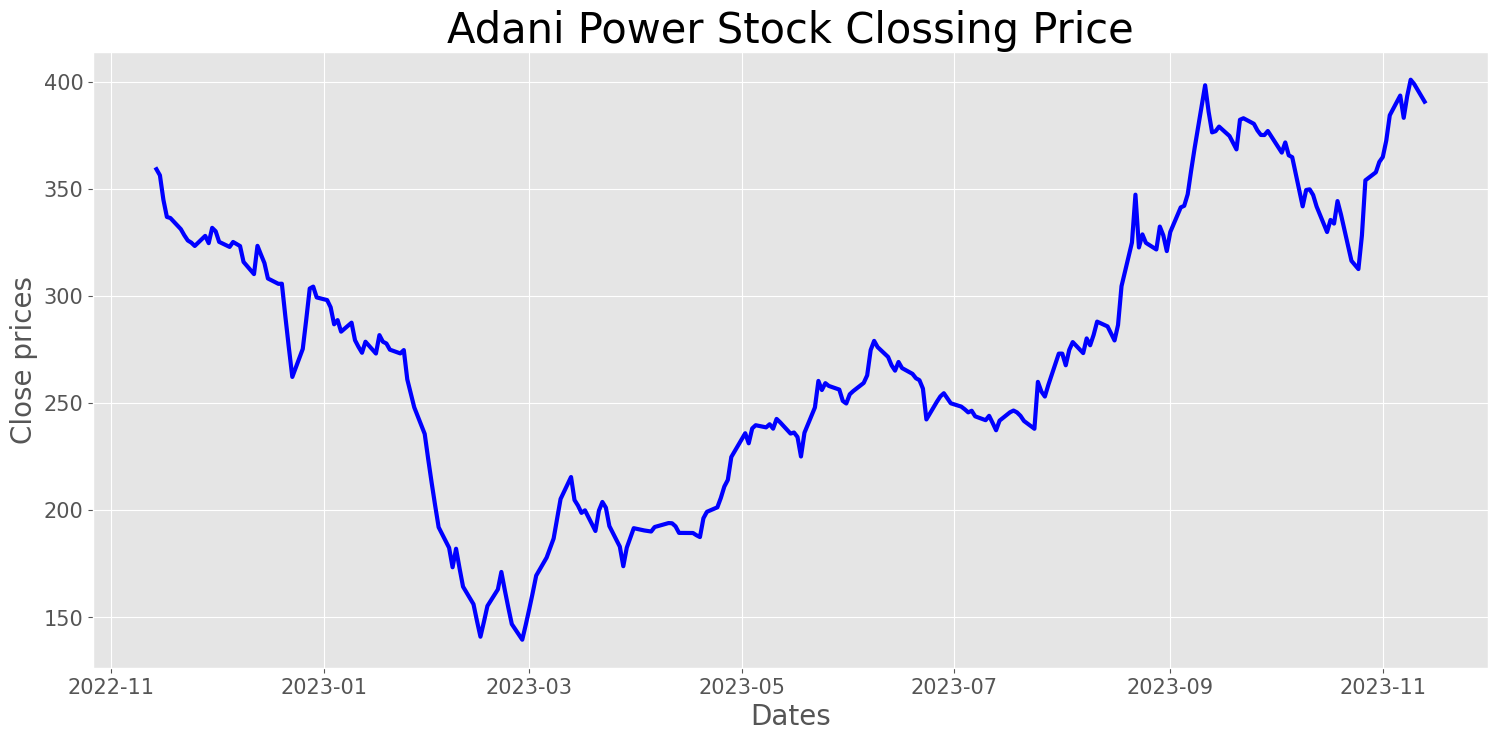

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize= (20))
plt.xticks(fontsize = 15)
plt.ylabel('Close prices', fontsize = 20)
plt.yticks(fontsize= 15)
plt.plot(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Adani Power Stock Closing Price', fontsize= 30 )
plt.show()

(array([14., 19., 24., 27., 39., 36., 16., 38., 17., 19.]),
 array([139.5 , 165.66, 191.82, 217.98, 244.14, 270.3 , 296.46, 322.62,
        348.78, 374.94, 401.1 ]),
 <BarContainer object of 10 artists>)

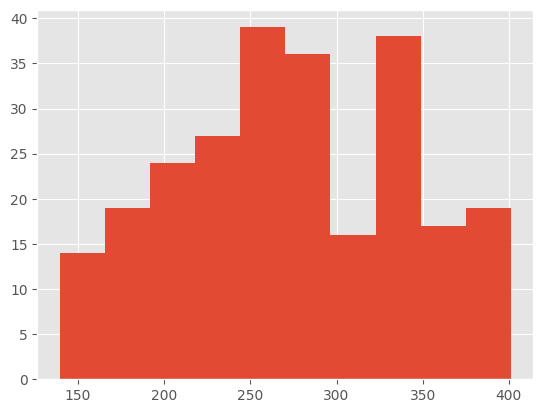

In [ ]:
plt.hist(stock_data.Close)

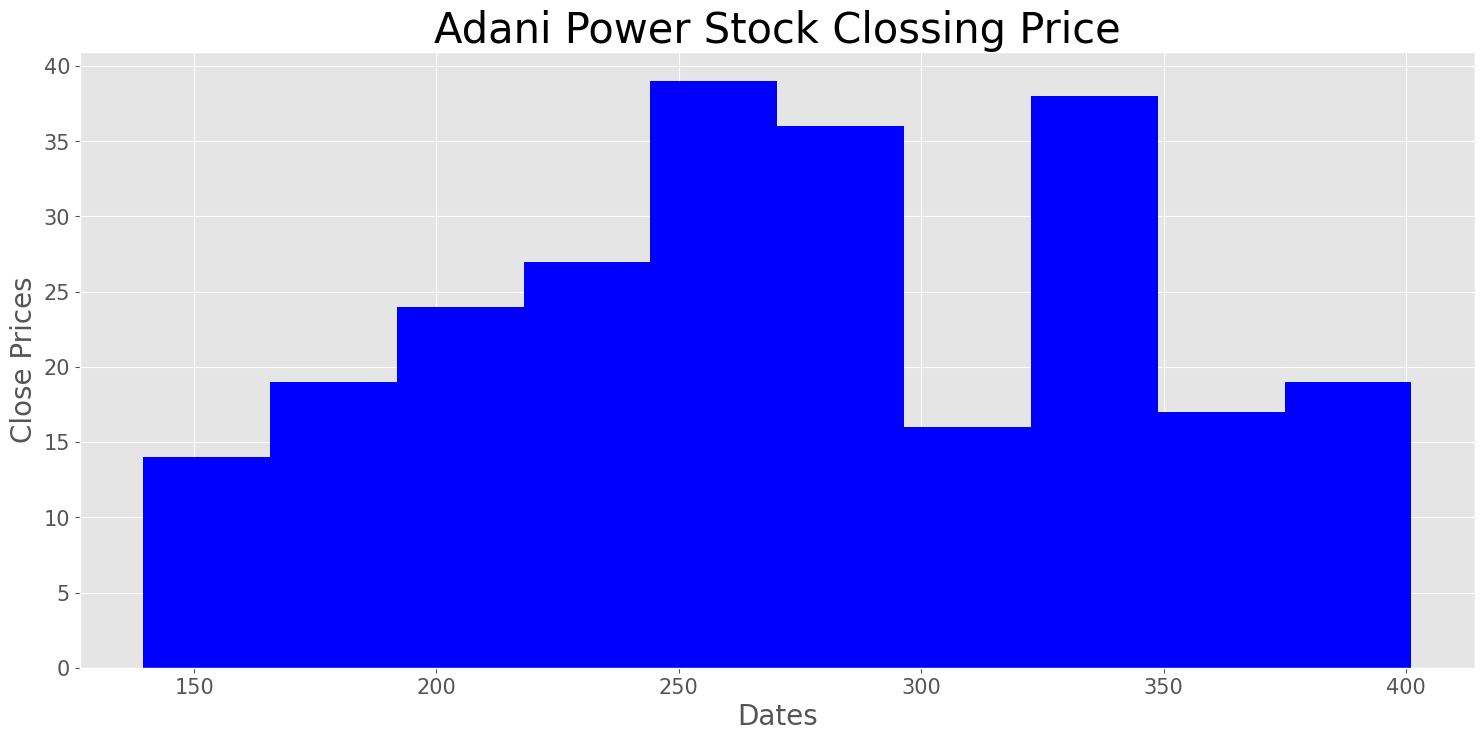

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel('Close Prices', fontsize = 20)
plt.yticks(fontsize = 15)
plt.hist(stock_data['Close'], linewidth = 3, color = 'blue')
plt.title('Adani Power Stock Closing Price', fontsize = 30)
plt.show()

<Axes: xlabel='Close', ylabel='Density'>

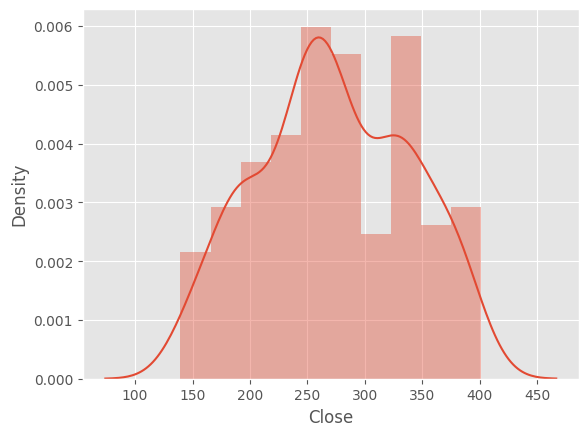

In [ ]:
import seaborn as sns
sns.distplot(stock_data.Close)

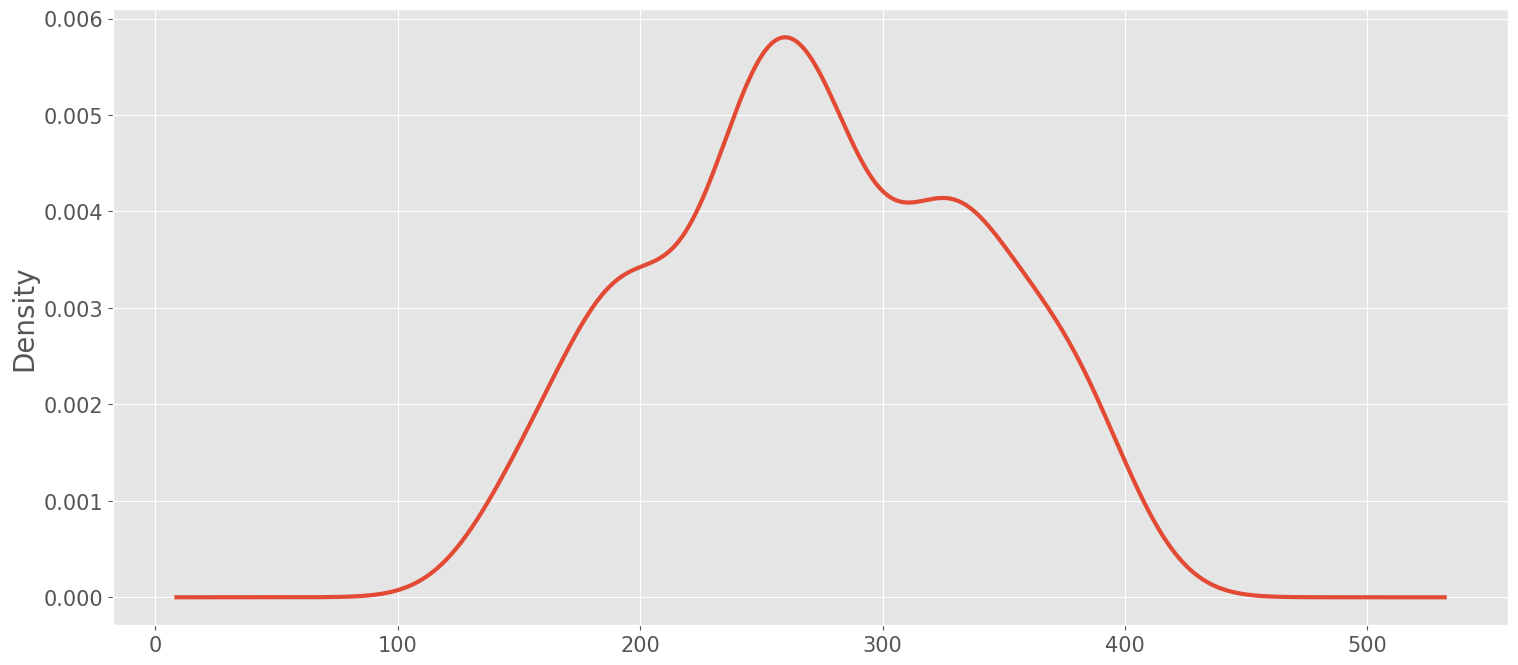

In [ ]:
df_close = stock_data['Close']
df_close.plot(kind = 'kde',figsize = (18,8), linewidth= 3 )
plt.xticks(fontsize = 15)
plt.grid("both")
plt.ylabel('Density', fontsize = 20)
plt.yticks(fontsize = 15)
plt.show()

In [ ]:
stock_data['Close']

Date
2023-11-13    390.85
2023-11-10    399.10
2023-11-09    401.10
2023-11-08    393.45
2023-11-07    383.30
               ...  
2022-11-18    336.50
2022-11-17    337.00
2022-11-16    345.00
2022-11-15    356.45
2022-11-14    359.30
Name: Close, Length: 249, dtype: float64

In [ ]:
stock_data['Close'].rolling(12)

Rolling [window=12,center=False,axis=0,method=single]

In [ ]:
rolmean = stock_data['Close'].rolling(12).mean()
rolmean

Date
2023-11-13           NaN
2023-11-10           NaN
2023-11-09           NaN
2023-11-08           NaN
2023-11-07           NaN
                 ...    
2022-11-18    327.845833
2022-11-17    329.012500
2022-11-16    330.650000
2022-11-15    332.829167
2022-11-14    335.112500
Name: Close, Length: 249, dtype: float64

In [ ]:
rolstd = stock_data['Close'].rolling(12).std()
rolstd

Date
2023-11-13          NaN
2023-11-10          NaN
2023-11-09          NaN
2023-11-08          NaN
2023-11-07          NaN
                ...    
2022-11-18     4.043708
2022-11-17     4.511104
2022-11-16     6.280272
2022-11-15     9.734626
2022-11-14    12.357076
Name: Close, Length: 249, dtype: float64

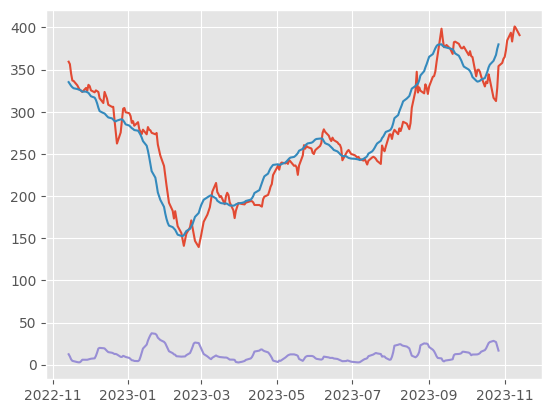

In [ ]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [ ]:
rolmean = stock_data['Close'].rolling(30).mean()
rolstd = stock_data['Close'].rolling(30).std()

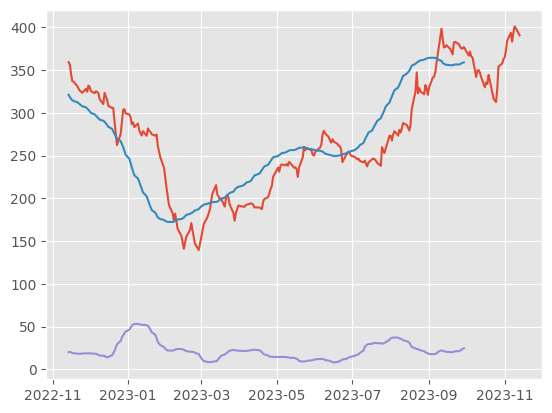

In [ ]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [ ]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [ ]:
adft

(-1.6494691795802923,
 0.4573172780761535,
 1,
 247,
 {'1%': -3.457105309726321,
  '5%': -2.873313676101283,
  '10%': -2.5730443824681606},
 1599.8374345278537)

In [ ]:
adft[0:4]

(-1.6494691795802923, 0.4573172780761535, 1, 247)

In [ ]:
pd.Series(adft[0:4], index= ['test stats', 'P-value', 'lag', 'data points'])

test stats      -1.649469
P-value          0.457317
lag              1.000000
data points    247.000000
dtype: float64

In [ ]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(12).mean()
  rolstd = timeseries.rolling(12).std()
  plt.figure(figsize = (18,8))
  plt.grid('both')
  plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
  plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
  plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
  plt.legend(loc='best', fontsize = 20,shadow=True,facecolor='lightpink',edgecolor = 'k')
  plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.show(block=False)
  print("Results of dickey fuller test")
  adft = adfuller(timeseries,autolag='AIC')
  output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,values in adft[4].items():
    output['critical value (%s)'%key] = values
  print(output)

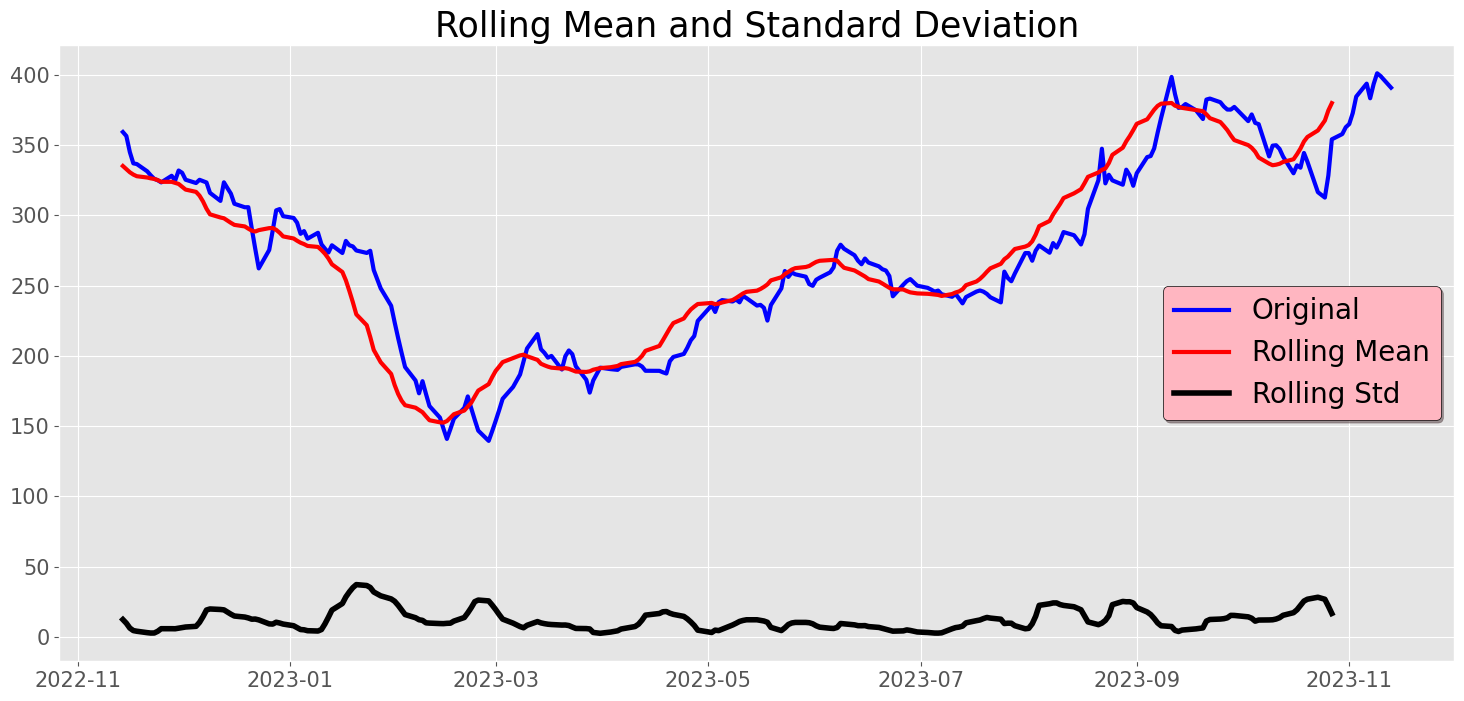

Results of dickey fuller test
Test Statistics                 -1.649469
p-value                          0.457317
No. of lags used                 1.000000
Number of observations used    247.000000
critical value (1%)             -3.457105
critical value (5%)             -2.873314
critical value (10%)            -2.573044
dtype: float64


In [ ]:
test_stationarity(stock_data.Close)

In [ ]:
def test_stationarity(timeseries):
  rolmean = timeseries.rolling(30).mean()
  rolstd = timeseries.rolling(30).std()
  plt.figure(figsize = (18,8))
  plt.grid('both')
  plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
  plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
  plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
  plt.legend(loc='best', fontsize = 20,shadow=True,facecolor='lightpink',edgecolor = 'k')
  plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
  plt.xticks(fontsize = 15)
  plt.yticks(fontsize = 15)
  plt.show(block=False)
  print("Results of dickey fuller test")
  adft = adfuller(timeseries,autolag='AIC')
  output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,values in adft[4].items():
    output['critical value (%s)'%key] = values
  print(output)


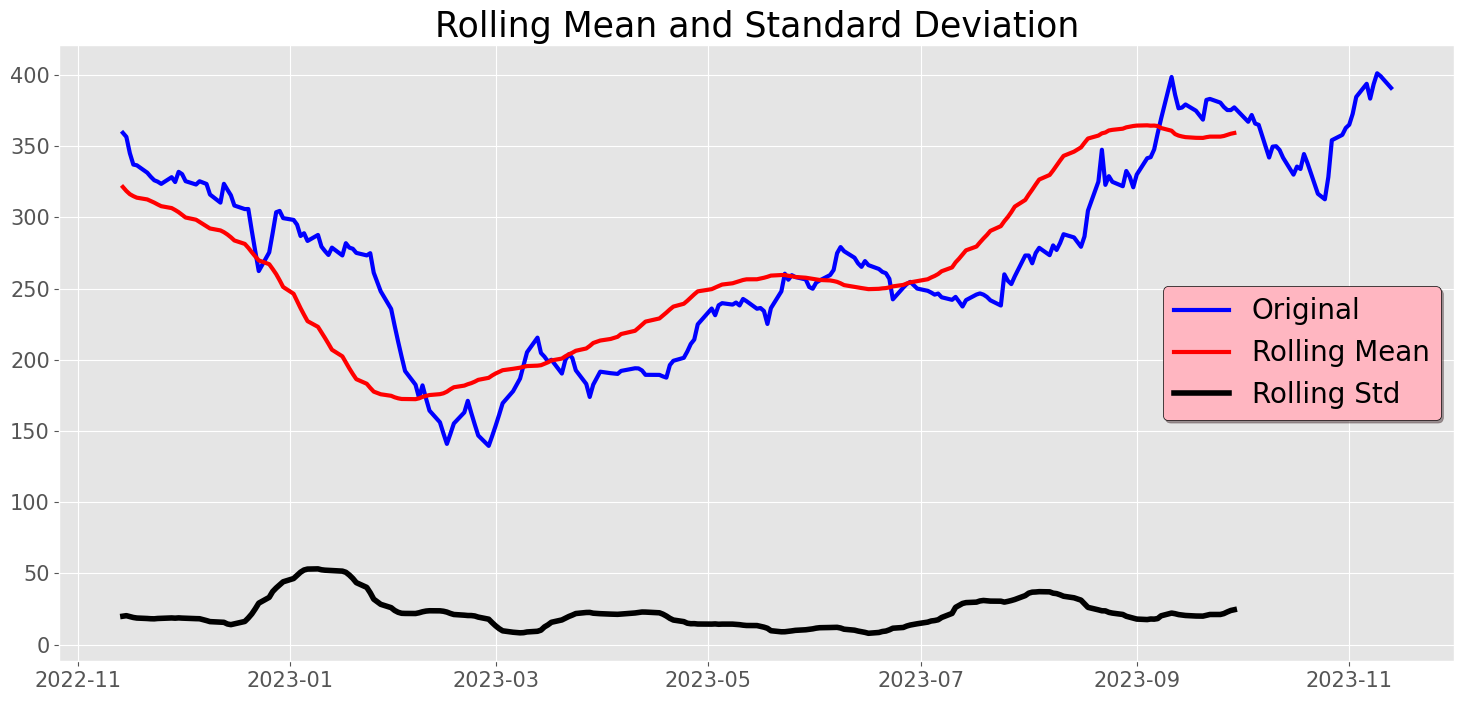

Results of dickey fuller test
Test Statistics                 -1.649469
p-value                          0.457317
No. of lags used                 1.000000
Number of observations used    247.000000
critical value (1%)             -3.457105
critical value (5%)             -2.873314
critical value (10%)            -2.573044
dtype: float64


In [ ]:
test_stationarity(stock_data.Close)

In [ ]:
stock_data.Close.isnull().sum()

0

<Axes: >

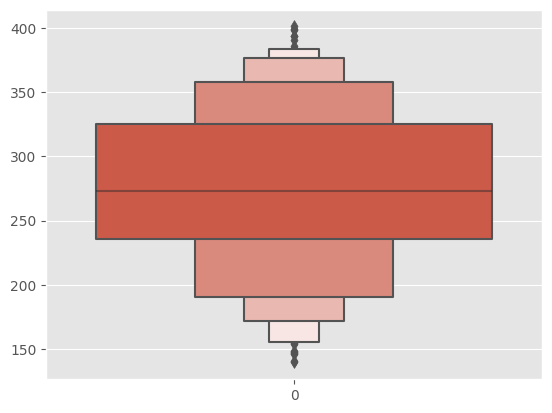

In [ ]:
sns.boxenplot(stock_data.Close)

In [ ]:
stock_data.Close.describe()

count    249.000000
mean     273.002610
std       65.713679
min      139.500000
25%      235.650000
50%      273.150000
75%      325.350000
max      401.100000
Name: Close, dtype: float64

In [ ]:
iqr_25 = stock_data.Close.quantile(0.25)
iqr_75 = stock_data.Close.quantile(0.75)

In [ ]:
iqr_25

235.65

In [ ]:
iqr_75

325.35

In [ ]:
iqr = iqr_75 - iqr_25
iqr

89.70000000000002

In [ ]:
upper_limit = iqr_75 + 1.5*iqr
lower_limit = iqr_25 - 1.5*iqr
print('Upper Limit', upper_limit)
print('Lower Limit', lower_limit)

Upper Limit 459.90000000000003
Lower Limit 101.1


In [ ]:
stock_data[stock_data.Close > upper_limit]

,Close
Date,


In [ ]:
stock_data[stock_data.Close < lower_limit]

,Close
Date,


In [ ]:
new_df_cap = stock_data.copy()
new_df_cap['Close'] = np.where(
    new_df_cap['Close'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Close'] < lower_limit,
        lower_limit,
        new_df_cap['Close']
        )
)

In [ ]:
new_df_cap.shape

(249, 1)

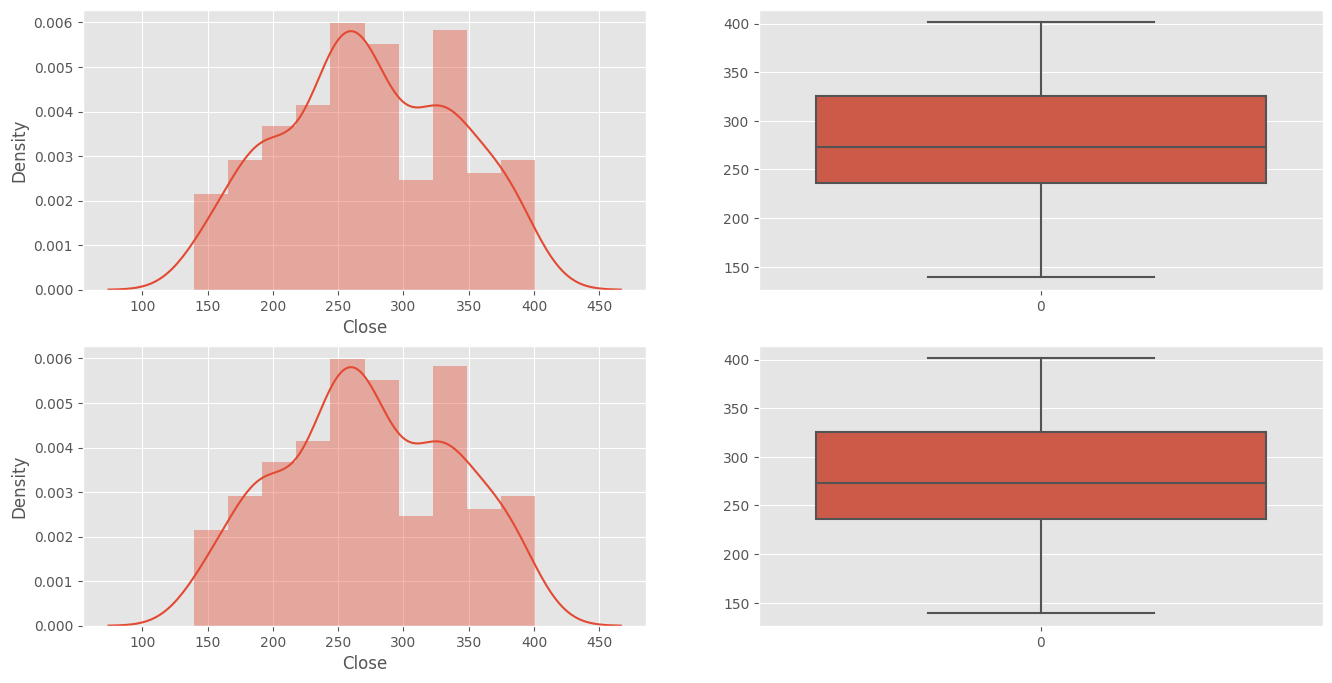

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(stock_data['Close'])
plt.subplot(2,2,2)
sns.boxplot(stock_data['Close'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Close'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Close'])
plt.show()

<Axes: >

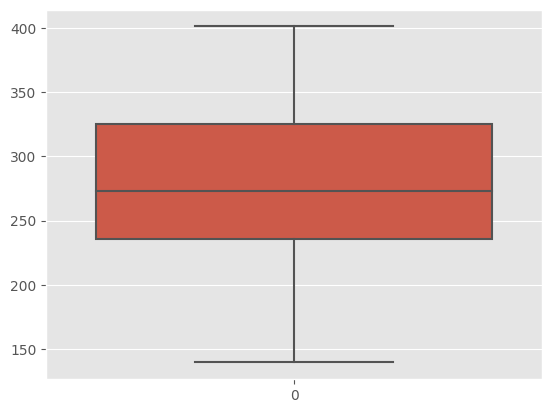

In [ ]:
sns.boxplot(stock_data['Close'])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
result = seasonal_decompose(stock_data[['Close']], period= 12)
result

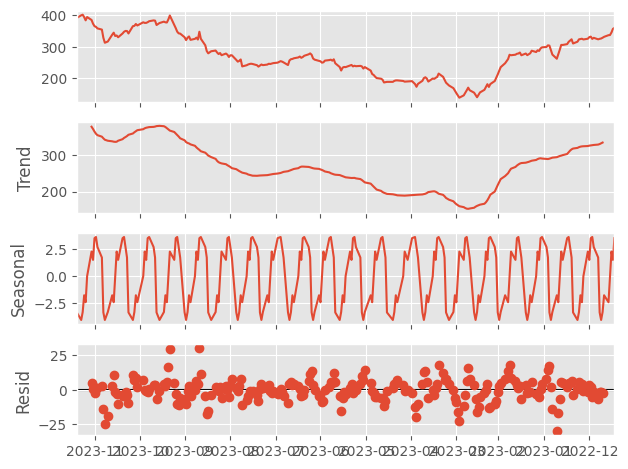

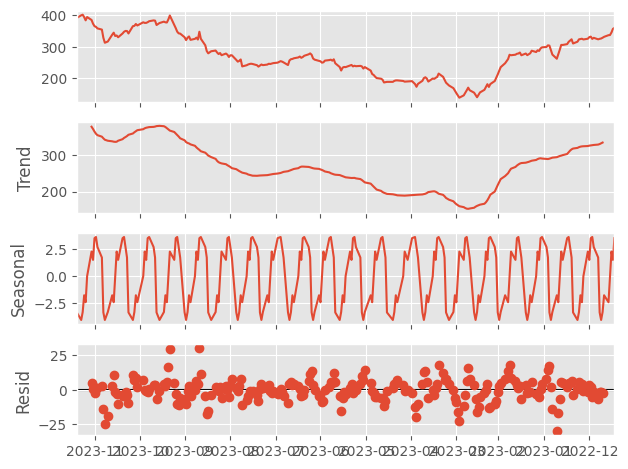

In [ ]:
result.plot()

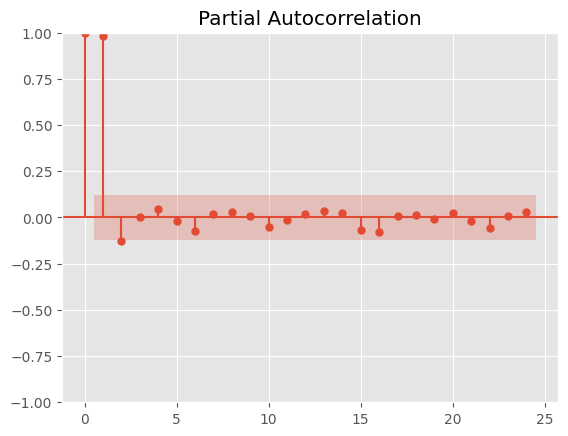

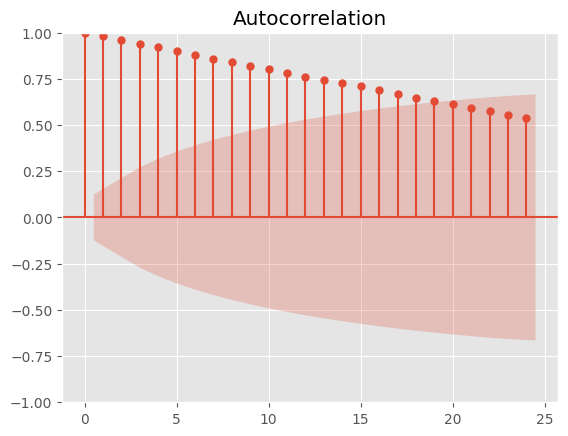

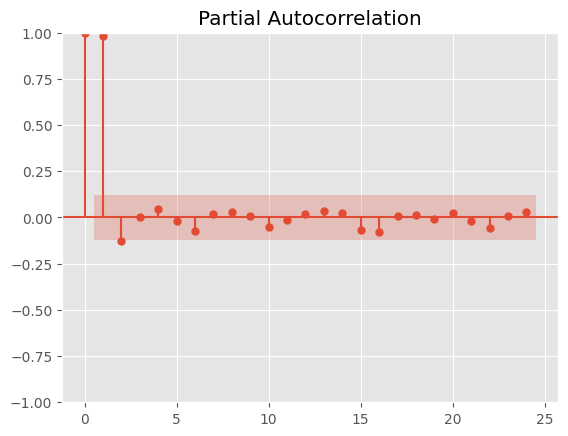

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [ ]:
df_close = stock_data['Close']
df_close

Date
2023-11-13    390.85
2023-11-10    399.10
2023-11-09    401.10
2023-11-08    393.45
2023-11-07    383.30
               ...  
2022-11-18    336.50
2022-11-17    337.00
2022-11-16    345.00
2022-11-15    356.45
2022-11-14    359.30
Name: Close, Length: 249, dtype: float64

In [ ]:
df_close.diff(2)

Date
2023-11-13      NaN
2023-11-10      NaN
2023-11-09    10.25
2023-11-08    -5.65
2023-11-07   -17.80
              ...  
2022-11-18     8.05
2022-11-17     5.70
2022-11-16     8.50
2022-11-15    19.45
2022-11-14    14.30
Name: Close, Length: 249, dtype: float64

In [ ]:
df_close = df_close.diff()
df_close = df_close.dropna()

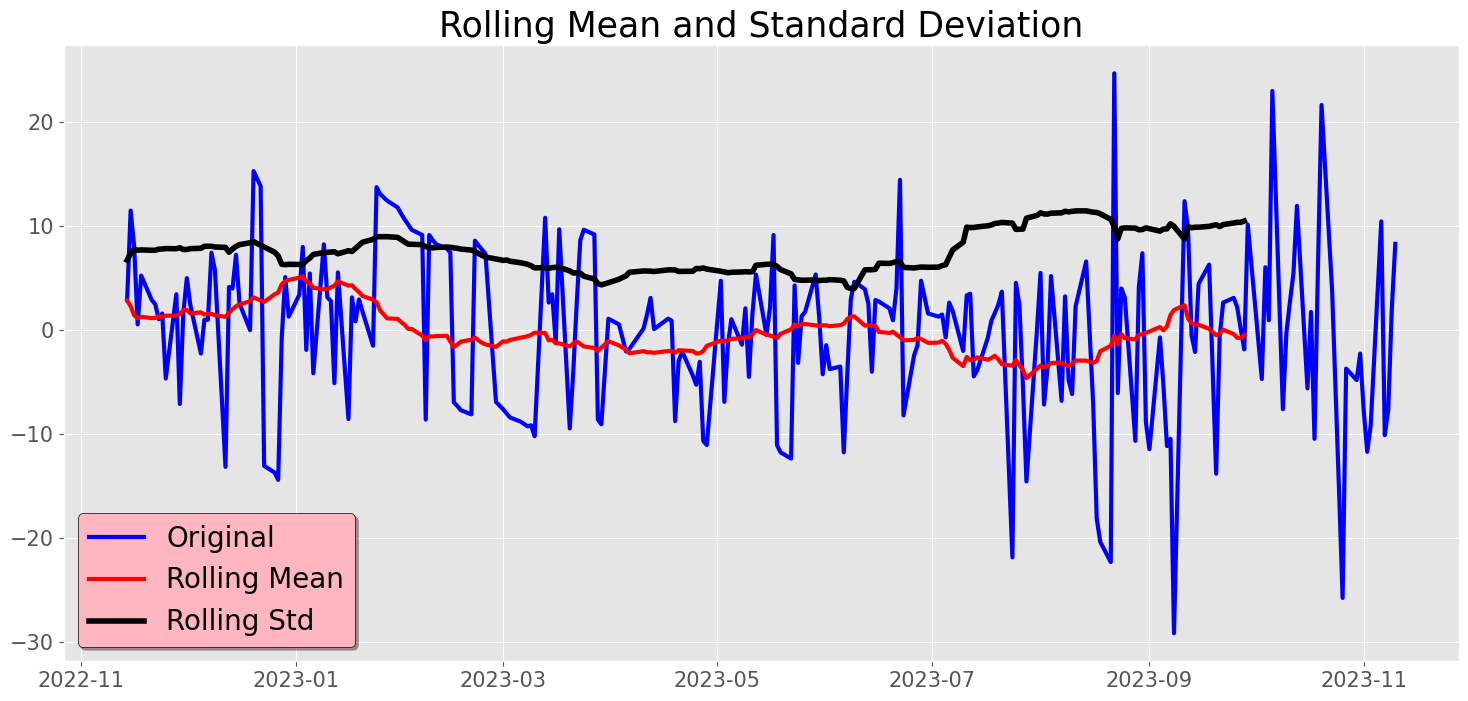

Results of dickey fuller test
Test Statistics               -1.244786e+01
p-value                        3.630630e-23
No. of lags used               0.000000e+00
Number of observations used    2.470000e+02
critical value (1%)           -3.457105e+00
critical value (5%)           -2.873314e+00
critical value (10%)          -2.573044e+00
dtype: float64


In [ ]:
test_stationarity(df_close)

In [ ]:
df_close[0:-40]

Date
2023-11-10     8.25
2023-11-09     2.00
2023-11-08    -7.65
2023-11-07   -10.15
2023-11-06    10.40
              ...  
2023-01-13     5.50
2023-01-12    -5.15
2023-01-11     2.75
2023-01-10     3.10
2023-01-09     8.20
Name: Close, Length: 208, dtype: float64

In [ ]:
df_close[-40:]

Date
2023-01-06    -4.20
2023-01-05     5.40
2023-01-04    -1.95
2023-01-03     7.95
2023-01-02     3.35
2022-12-30     1.25
2022-12-29     5.05
2022-12-28    -0.90
2022-12-27   -14.45
2022-12-26   -13.75
2022-12-23   -13.10
2022-12-22    13.80
2022-12-21    14.50
2022-12-20    15.25
2022-12-19    -0.05
2022-12-16     2.50
2022-12-15     7.20
2022-12-14     3.95
2022-12-13     4.10
2022-12-12   -13.20
2022-12-09     5.70
2022-12-08     7.40
2022-12-07     0.95
2022-12-06     0.95
2022-12-05    -2.30
2022-12-02     2.35
2022-12-01     4.95
2022-11-30     1.60
2022-11-29    -7.15
2022-11-28     3.40
2022-11-25    -4.70
2022-11-24     1.55
2022-11-23     1.00
2022-11-22     2.45
2022-11-21     2.85
2022-11-18     5.20
2022-11-17     0.50
2022-11-16     8.00
2022-11-15    11.45
2022-11-14     2.85
Name: Close, dtype: float64

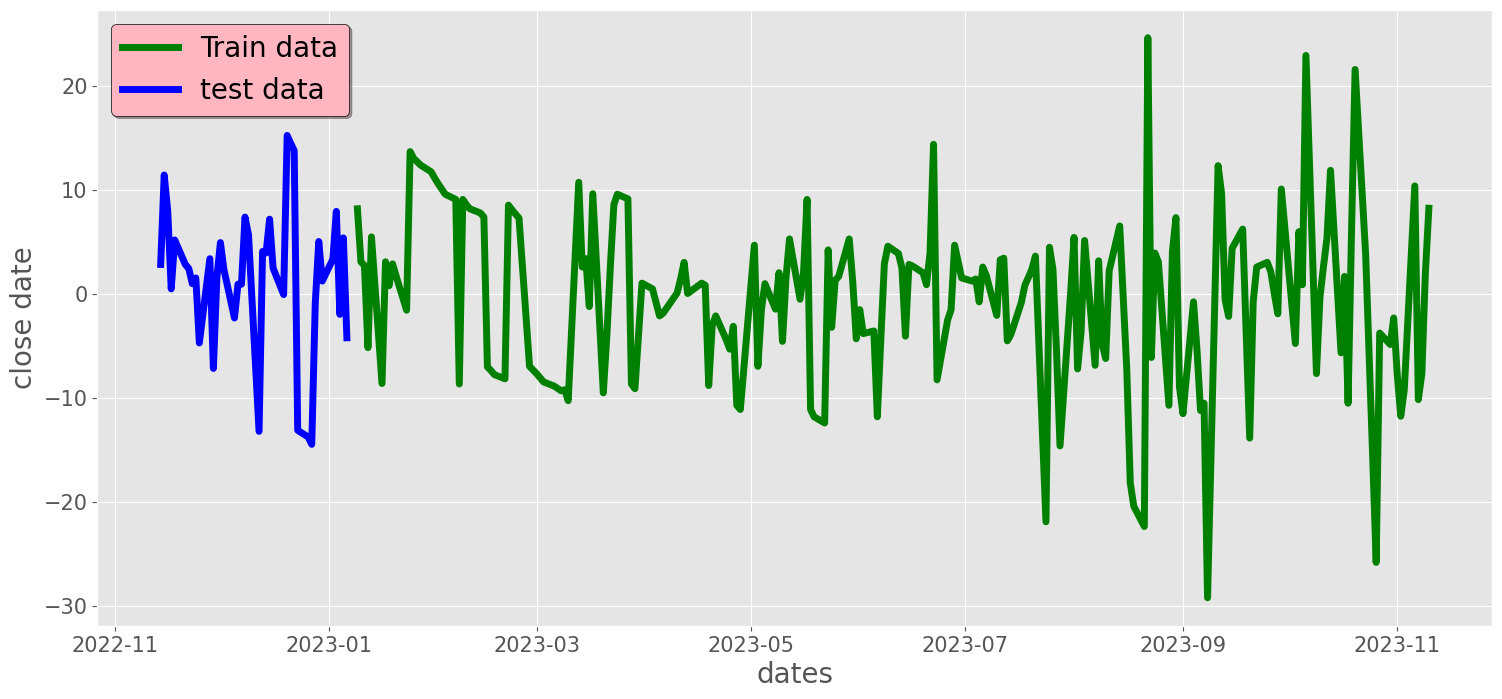

In [ ]:
train_data = df_close[0:-40]
test_data = df_close[-40:]
plt.figure(figsize= (18,8))
plt.grid(True)
plt.xlabel('dates', fontsize = 20 )
plt.ylabel('close date', fontsize = 20)
plt.xticks(fontsize = 15 )
plt.yticks(fontsize = 15 )
plt.plot(train_data, 'green', label = 'Train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor ='k')

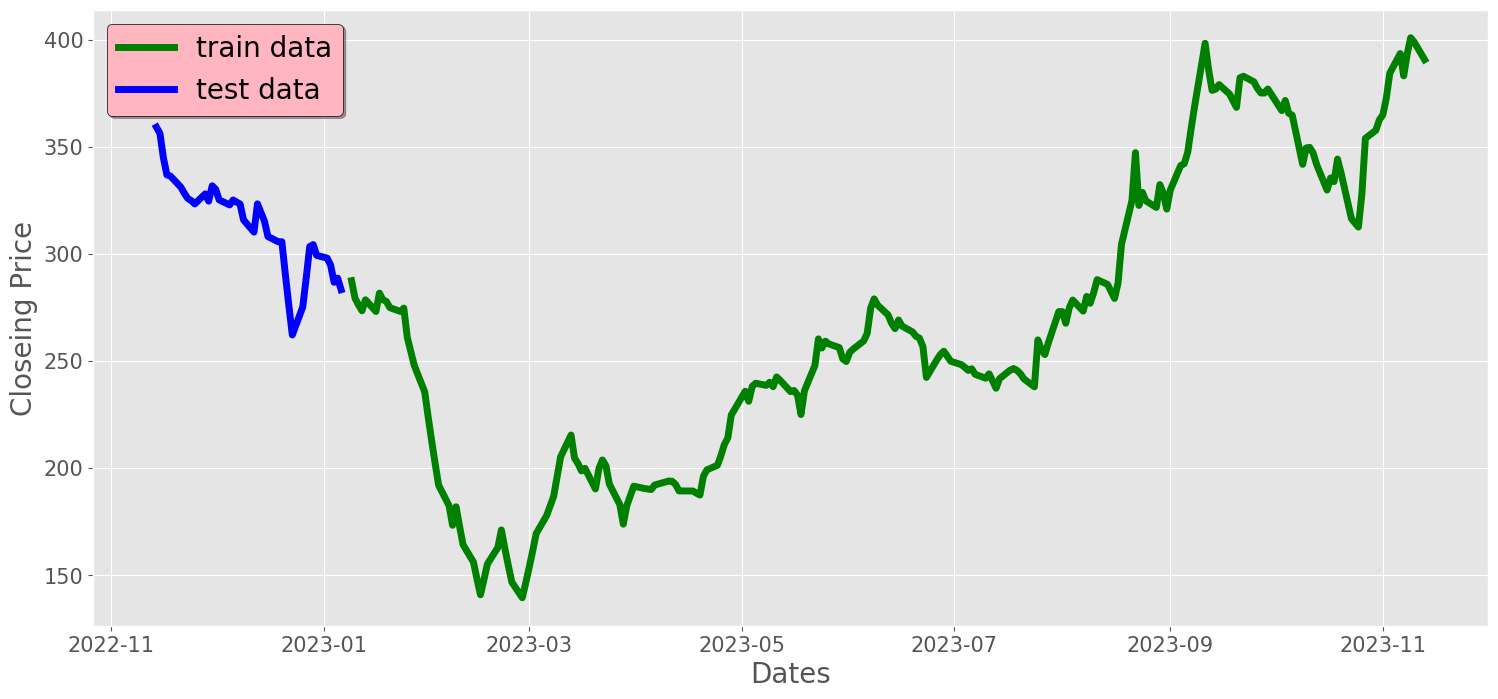

In [ ]:
train_data = stock_data['Close'][0:-40] ##train data
test_data = stock_data['Close'][-40:] ## testing data
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('Closeing Price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 5)
plt.plot(test_data, 'blue', label = 'test data', linewidth = 5)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor ='k')


In [ ]:
stock_data['Close']

Date
2023-11-13    390.85
2023-11-10    399.10
2023-11-09    401.10
2023-11-08    393.45
2023-11-07    383.30
               ...  
2022-11-18    336.50
2022-11-17    337.00
2022-11-16    345.00
2022-11-15    356.45
2022-11-14    359.30
Name: Close, Length: 249, dtype: float64

In [ ]:
249-40

209

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
history = [x for x in train_data]

In [ ]:
model = ARIMA(history, order= (1,1,1) )

In [ ]:
model = model.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  209
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -726.066
Date:                Mon, 27 Nov 2023   AIC                           1458.132
Time:                        11:30:55   BIC                           1468.145
Sample:                             0   HQIC                          1462.181
                                - 209                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2247      0.290      0.776      0.438      -0.343       0.793
ma.L1         -0.0115      0.288     -0.040      0.968      -0.576       0.553
sigma2        63.0116      4.930     12.780      0.000      53.348      72.675
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                37.11
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.forecast()

array([289.35604967])

In [ ]:
mean_squared_error([test_data[0]], model.forecast())

35.474527701334765

In [ ]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

5.95604967250398

In [ ]:
def train_arima_model(X, y, arima_order):
  history = [x for x in X]
  predictions = list()
  for t in range(len(y)):
    model = ARIMA(history, order= arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[t])

  rmse = np.sqrt(mean_squared_error(y, predictions))
  return rmse


In [ ]:
def evaluate_models(dataset, test, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float('inf'), None
  for p in p_values:
      for d in d_values:
          for q in q_values:
              order = (p,d,q)
              try:
                  rmse = train_arima_model(dataset, test, order)
                  if rmse < best_score:
                      best_score, best_cfg = rmse, order
                  print('ARIMA%s RMSE= %.3f' %(order, rmse))
              except:
                  continue
  print('Best ARIMA%s RMSE= %.3f' %(best_cfg, best_score))

In [ ]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
evaluate_models(train_data, test_data, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE= 49.826
ARIMA(0, 0, 1) RMSE= 27.989
ARIMA(0, 0, 2) RMSE= 21.811
ARIMA(0, 1, 0) RMSE= 7.211
ARIMA(0, 1, 1) RMSE= 6.913
ARIMA(0, 1, 2) RMSE= 6.870
ARIMA(0, 2, 0) RMSE= 8.473
ARIMA(0, 2, 1) RMSE= 7.271
ARIMA(0, 2, 2) RMSE= 6.899
ARIMA(1, 0, 0) RMSE= 7.201
ARIMA(1, 0, 1) RMSE= 6.908
ARIMA(1, 0, 2) RMSE= 6.876
ARIMA(1, 1, 0) RMSE= 6.891
ARIMA(1, 1, 1) RMSE= 6.906
ARIMA(1, 1, 2) RMSE= 6.970
ARIMA(1, 2, 0) RMSE= 8.062
ARIMA(1, 2, 1) RMSE= 6.894
ARIMA(1, 2, 2) RMSE= 6.909
ARIMA(2, 0, 0) RMSE= 6.886
ARIMA(2, 0, 1) RMSE= 6.904
ARIMA(2, 0, 2) RMSE= 6.832
ARIMA(2, 1, 0) RMSE= 6.908
ARIMA(2, 1, 1) RMSE= 6.926
ARIMA(2, 1, 2) RMSE= 6.932
ARIMA(2, 2, 0) RMSE= 8.173
ARIMA(2, 2, 1) RMSE= 6.912
ARIMA(2, 2, 2) RMSE= 6.902
Best ARIMA(2, 0, 2) RMSE= 6.832


In [ ]:
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
  model = ARIMA(history,order=(1,0,0))
  model_fit = model.fit()
  fc = model_fit.forecast(alpha = 0.05)
  predictions.append(fc)
  history.append(test_data[t])
print('RMSE of ARIMA Model:', np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of ARIMA Model: 7.200937888944615


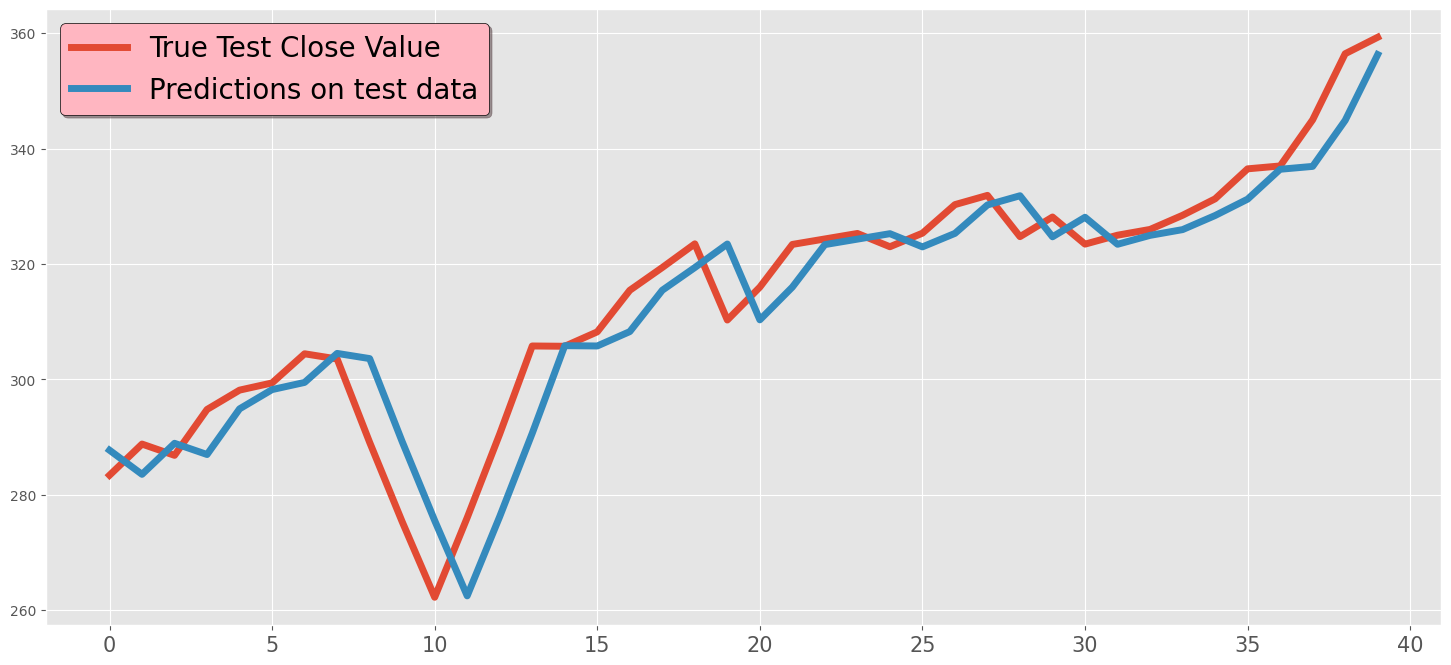

In [ ]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value',linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [ ]:
fc_series = pd.Series(predictions, index= test_data.index)

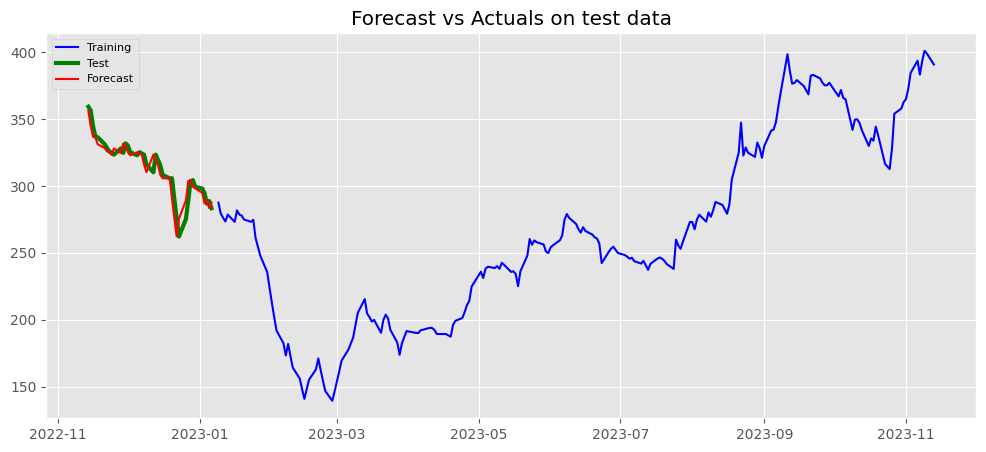

In [ ]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

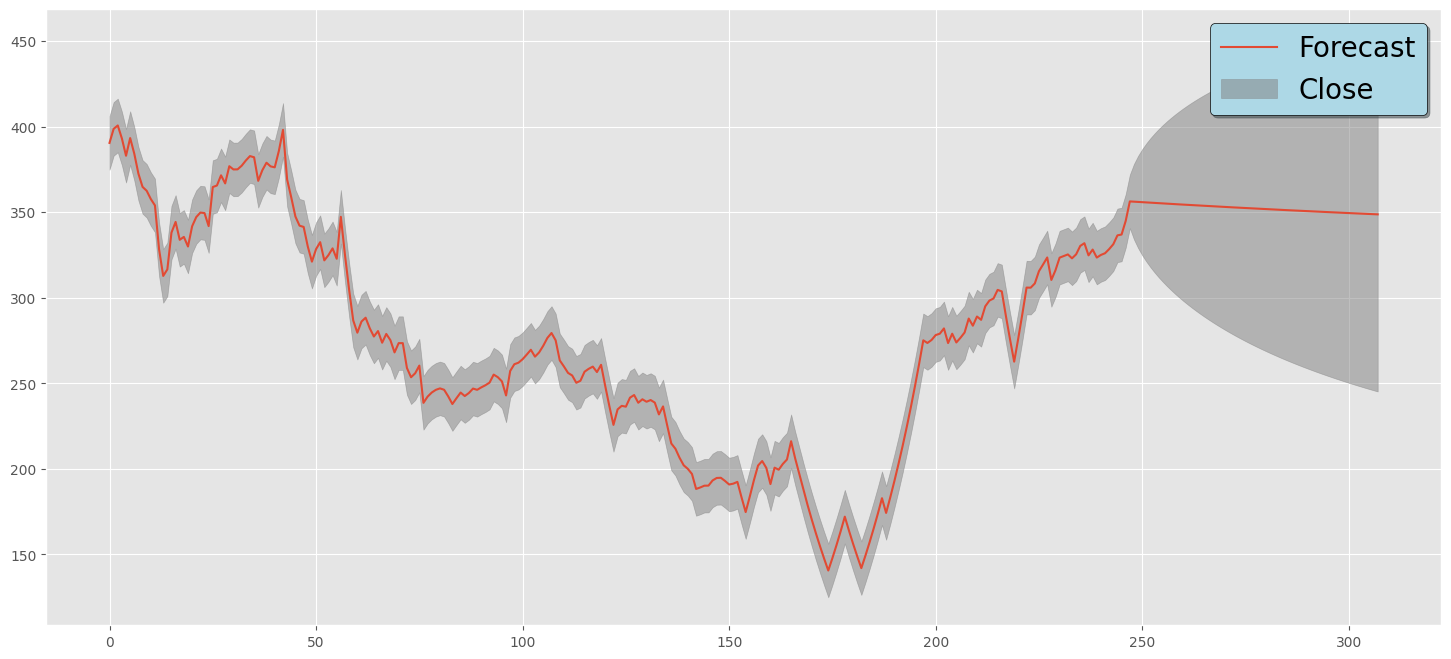

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20,shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
  model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order= (1,1,1,3))
  model_fit = model.fit()
  fc = model_fit.forecast()
  predictions.append(fc)
  history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data,predictions)))

RMSE of SARIMA Model: 7.111290831206888


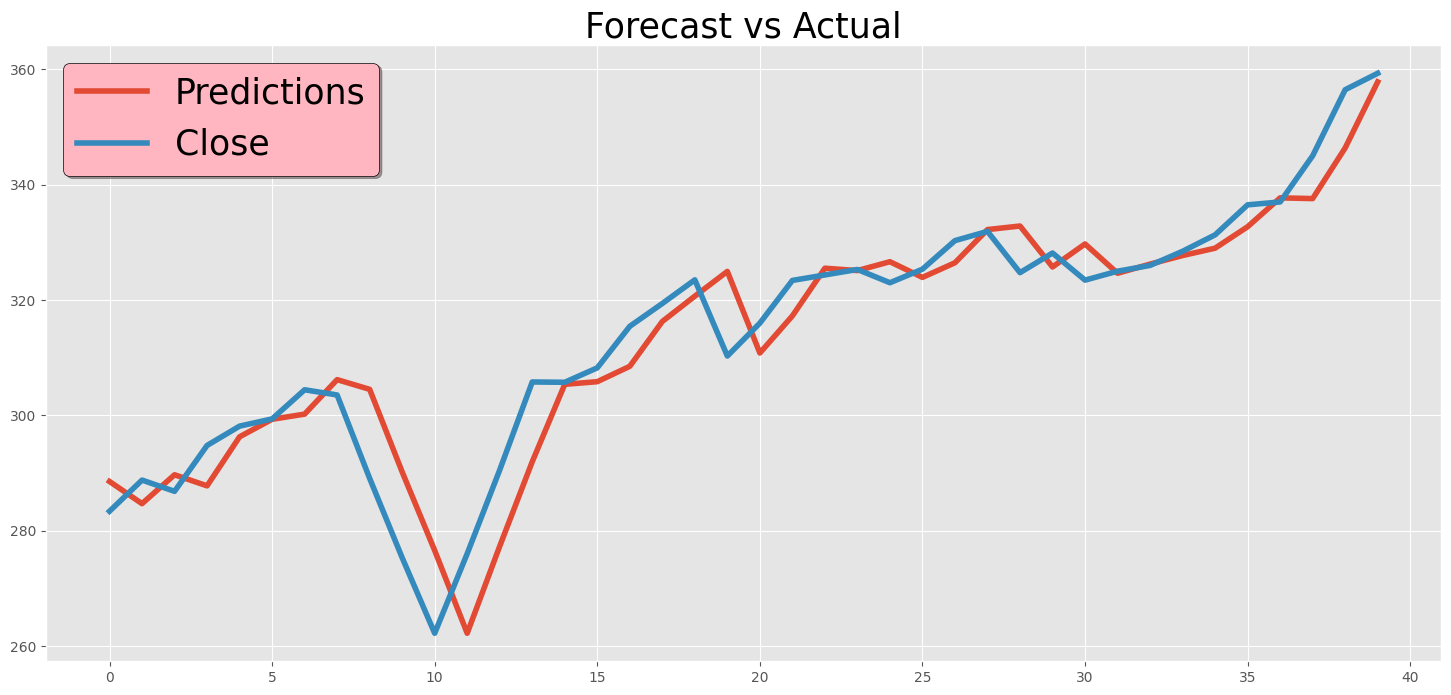

In [ ]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(40), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(40), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')